#### importing the libraries

In [1]:
import pandas as pd
import numpy as np


#### Loading the Dataset

In [2]:
df = pd.read_csv('data.csv', encoding = 'ISO-8859-1')

#### Number of Rows and COlumns

In [3]:
df.shape

(541909, 8)

#### Accessing First five rows

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


#### Accessing last five rows 

In [5]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


#### Searching Specific Column


In [6]:
col = input('enter name to search: ')

if col in df.columns:
    print(f"{col} column exists!")
else:
    print(f"{col}  doesnt exist!")
    

enter name to search:  n


n  doesnt exist!


#### Accessing columns one by one

In [7]:
for col in df.columns:
    print(col)

InvoiceNo
StockCode
Description
Quantity
InvoiceDate
UnitPrice
CustomerID
Country


#### Renaming column names

In [8]:
d = {
        'InvoiceNo': 'invoice_num',
        'StockCode':'stock_code',
        'Description': 'description',
        'Quantity':'quantity',
        'InvoiceDate':'invoice_date',
        'UnitPrice':'unit_price',
        'CustomerID':'cust_id',
        'Country':'country'          
}
df.rename(columns = d , inplace = True)

#### Checking column types

In [9]:
df.dtypes

invoice_num      object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
cust_id         float64
country          object
dtype: object

#### DataFrame information

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_num   541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  int64  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   cust_id       406829 non-null  float64
 7   country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Checking missing Values

In [11]:
df.isna().sum().sort_values(ascending = False)

cust_id         135080
description       1454
stock_code           0
invoice_num          0
quantity             0
invoice_date         0
unit_price           0
country              0
dtype: int64

#### Converting invoice_date data type from object to datetime data type.

In [12]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format = '%m/%d/%Y %H:%M' )

 #### Unique Operation on Country Column

In [13]:
a = df['country'].unique()
print(a)
print()
print(len(a))

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']

38


#### Calculating each country how many times Transactions took place

In [14]:
s = df['country'].value_counts()
s

country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


##### TOP 5 MOST TRANSACTIONS COUNTRIES

In [15]:
s.head()

country
United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Name: count, dtype: int64

#### TOP  5 LEAST TRANSACTION COMPANIES

In [16]:
s.tail()

country
Lithuania         35
Brazil            32
Czech Republic    30
Bahrain           19
Saudi Arabia      10
Name: count, dtype: int64

#### Specific Country Transactions

In [17]:
con = df['country'] == 'Saudi Arabia'
df[con]

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
100810,544838,22915,ASSORTED BOTTLE TOP MAGNETS,12,2011-02-24 10:34:00,0.42,12565.0,Saudi Arabia
100811,544838,22363,GLASS JAR MARMALADE,6,2011-02-24 10:34:00,2.95,12565.0,Saudi Arabia
100812,544838,22362,GLASS JAR PEACOCK BATH SALTS,6,2011-02-24 10:34:00,2.95,12565.0,Saudi Arabia
100813,544838,22361,GLASS JAR DAISY FRESH COTTON WOOL,6,2011-02-24 10:34:00,2.95,12565.0,Saudi Arabia
100814,544838,22553,PLASTERS IN TIN SKULLS,12,2011-02-24 10:34:00,1.65,12565.0,Saudi Arabia
100815,544838,22555,PLASTERS IN TIN STRONGMAN,12,2011-02-24 10:34:00,1.65,12565.0,Saudi Arabia
100816,544838,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-02-24 10:34:00,1.65,12565.0,Saudi Arabia
100817,544838,20781,GOLD EAR MUFF HEADPHONES,2,2011-02-24 10:34:00,5.49,12565.0,Saudi Arabia
100818,544838,22969,HOMEMADE JAM SCENTED CANDLES,12,2011-02-24 10:34:00,1.45,12565.0,Saudi Arabia
108127,C545507,22361,GLASS JAR DAISY FRESH COTTON WOOL,-5,2011-03-03 11:43:00,2.95,12565.0,Saudi Arabia


#### Country Wise Transactions 

In [18]:
u = df['country'].unique()
u

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [19]:
for country in u:
    print(country)
    con = df['country'] == country
    print(df[con])
    print()

United Kingdom
       invoice_num stock_code                          description  quantity  \
0           536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1           536365      71053                  WHITE METAL LANTERN         6   
2           536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3           536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4           536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...            ...        ...                                  ...       ...   
541889      581585      22466       FAIRY TALE COTTAGE NIGHT LIGHT        12   
541890      581586      22061  LARGE CAKE STAND  HANGING STRAWBERY         8   
541891      581586      23275     SET OF 3 HANGING OWLS OLLIE BEAK        24   
541892      581586      21217        RED RETROSPOT ROUND CAKE TINS        24   
541893      581586      20685                DOORMAT RED RETROSPOT        10   

              invoice_da

#### Working with Description Column

In [20]:
df['description']

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: description, Length: 541909, dtype: object

#### Converting from upper case to lower case

In [21]:
df['description'] = df['description'].str.lower()

In [22]:
df

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680.0,France


#### Checking missing values

In [23]:
df.isna().sum().sort_values(ascending = False)

cust_id         135080
description       1454
stock_code           0
invoice_num          0
quantity             0
invoice_date         0
unit_price           0
country              0
dtype: int64

#### Handling missing values:

In [24]:
df_new = df.dropna()

#### Checking missing values dropped or not

In [25]:
df_new.isna().sum()

invoice_num     0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
cust_id         0
country         0
dtype: int64

#### Checking no of rows and columns

In [26]:
df_new.shape

(406829, 8)

#### New DataFrame Information

In [27]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   406829 non-null  object        
 1   stock_code    406829 non-null  object        
 2   description   406829 non-null  object        
 3   quantity      406829 non-null  int64         
 4   invoice_date  406829 non-null  datetime64[ns]
 5   unit_price    406829 non-null  float64       
 6   cust_id       406829 non-null  float64       
 7   country       406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


#### Apply operations on cust_id

#### checking cust_id data type

In [28]:
df_new.dtypes

invoice_num             object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
cust_id                float64
country                 object
dtype: object

#### Converting cust_id float type into integer data type

In [29]:
import warnings
warnings.filterwarnings('ignore')

df_new['cust_id'] = df_new['cust_id'].astype('int64')


In [30]:
df_new.dtypes

invoice_num             object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
cust_id                  int64
country                 object
dtype: object

#### df_new statistical information



In [31]:
df_new.describe()

,quantity,invoice_date,unit_price,cust_id
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


#### filtering all the negative values for qauntity column

In [32]:
con  = df_new['quantity']<0
df_new[con]

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
141,C536379,D,discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,set of 3 coloured flying ducks,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,plasters in tin circus parade,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,pack of 12 pink paisley tissues,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,pack of 12 blue paisley tissues,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,zinc t-light holder stars small,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,victorian sewing box large,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,hanging heart jar t-light holder,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


#### Removing Negative values

In [33]:
con = df_new['quantity'] > 0
df_new = df_new[con]

In [34]:
df_new.describe()

,quantity,invoice_date,unit_price,cust_id
count,397924.000000,397924,397924.000000,397924.000000
mean,13.021823,2011-07-10 23:43:36.912475648,3.116174,15294.315171
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,180.420210,NaN,22.096788,1713.169877


#### Adding the column - amount spent



In [35]:
df_new['amount_spent'] = df_new['quantity'] * df_new['unit_price']


In [36]:
df_new.sample()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,amount_spent
264762,560118,22115,metal sign empire tea,12,2011-07-15 10:21:00,0.79,16818,United Kingdom,9.48


#### Changing the order of Columns

In [37]:
col_order = ['invoice_num','invoice_date','stock_code','description','quantity','unit_price','amount_spent','cust_id','country']

In [38]:
df_new = df_new[col_order]

#### checking New order

In [39]:
df_new.columns.to_list()

['invoice_num',
 'invoice_date',
 'stock_code',
 'description',
 'quantity',
 'unit_price',
 'amount_spent',
 'cust_id',
 'country']

#### Total how much money generated

In [40]:
print(df_new['amount_spent'].sum())

8911407.904


In [41]:
df_new['amount_spent'].min()

np.float64(0.0)

In [42]:
df_new['amount_spent'].max()

np.float64(168469.6)

#### Focusing on Invoice_date column

In [43]:
df_new['invoice_date']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: invoice_date, Length: 397924, dtype: datetime64[ns]

#### converting series to datetime properties object

In [44]:
df_new['invoice_date'].dt

In [45]:
#### accessing year and month

In [46]:
df_new['invoice_date'].dt.year


0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: invoice_date, Length: 397924, dtype: int32

In [47]:
df_new['invoice_date'].dt.month

0         12
1         12
2         12
3         12
4         12
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: invoice_date, Length: 397924, dtype: int32

#### Inserting year_month column into 2nd position

In [48]:
c1 = 'year_month'
v1 = df_new['invoice_date'].map(lambda col: 100 * (col.year) + col.month)
df_new.insert(loc = 2 ,column = c1,value = v1)

#### insert the month column

In [49]:
c2 = 'month'
v2 = df_new['invoice_date'].dt.month
df_new.insert(loc = 3 , column = c2,value = v2)

In [50]:
df_new.sample()

,invoice_num,invoice_date,year_month,month,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
108961,545573,2011-03-03 16:58:00,201103,3,84755,colour glass t-light holder hanging,16,0.65,10.4,15393,United Kingdom


#### inserting a day column

In [51]:
c3 = 'day'
v3 = (df_new['invoice_date'].dt.dayofweek)+1
df_new.insert(loc = 4, column = c3,value = v3)

In [52]:
df_new.head(2)

,invoice_num,invoice_date,year_month,month,day,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom


#### displaying all columns once


In [53]:
df_new.columns.to_list()

['invoice_num',
 'invoice_date',
 'year_month',
 'month',
 'day',
 'stock_code',
 'description',
 'quantity',
 'unit_price',
 'amount_spent',
 'cust_id',
 'country']

In [54]:
c4 = 'Hour'

v4 = df_new['invoice_date'].dt.hour

df_new.insert(loc = 5,column = c4,value = v4)

In [55]:
df_new.columns

Index(['invoice_num', 'invoice_date', 'year_month', 'month', 'day', 'Hour',
       'stock_code', 'description', 'quantity', 'unit_price', 'amount_spent',
       'cust_id', 'country'],
      dtype='object')

In [56]:
df_new.shape

(397924, 13)

#### Groupby Operation

#### Getting customer wise,country wise no of txns count

In [57]:
df_new.groupby(by = ['cust_id', 'country'],as_index = False)['invoice_num'].count()

,cust_id,country,invoice_num
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17
...,...,...,...
4342,18280,United Kingdom,10
4343,18281,United Kingdom,7
4344,18282,United Kingdom,12
4345,18283,United Kingdom,756


In [58]:
money_spent = df_new.groupby(by = ['cust_id', 'country'], as_index = False)['amount_spent'].sum()

money_spent.sort_values(by = "amount_spent")

,cust_id,country,amount_spent
693,13256,United Kingdom,0.00
3226,16738,United Kingdom,3.75
1802,14792,United Kingdom,6.20
3023,16454,United Kingdom,6.90
4107,17956,United Kingdom,12.75
...,...,...,...
1888,14911,EIRE,143825.06
3017,16446,United Kingdom,168472.50
3737,17450,United Kingdom,194550.79
4210,18102,United Kingdom,259657.30


#### Top 5 customers who spent more money

In [59]:
money_spent.sort_values(by = "amount_spent", ascending  = False).head()

,cust_id,country,amount_spent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

 #### Number of order for different months

In [61]:
color  = sns.color_palette()

In [62]:
df_new.groupby('invoice_num')['year_month'].unique().value_counts().sort_index

<bound method Series.sort_index of year_month
[201111]    2658
[201110]    1929
[201109]    1756
[201105]    1555
[201012]    1400
[201106]    1393
[201107]    1331
[201103]    1321
[201108]    1281
[201104]    1149
[201102]     998
[201101]     987
[201112]     778
Name: count, dtype: int64>

####  Day wise Sales_count/business

In [63]:
df_new.groupby('invoice_num')['day'].unique().value_counts().sort_index

<bound method Series.sort_index of day
[4]    4033
[3]    3455
[2]    3185
[1]    2863
[5]    2831
[7]    2169
Name: count, dtype: int64>

#### FIlter only free products(cost = 0)

In [64]:
con = df_new['unit_price'] == 0
df_new[con]

,invoice_num,invoice_date,year_month,month,day,Hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
9302,537197,2010-12-05 14:02:00,201012,12,7,14,22841,round cake tin vintage green,1,0.0,0.0,12647,Germany
33576,539263,2010-12-16 14:36:00,201012,12,4,14,22580,advent calendar gingham sack,4,0.0,0.0,16560,United Kingdom
40089,539722,2010-12-21 13:45:00,201012,12,2,13,22423,regency cakestand 3 tier,10,0.0,0.0,14911,EIRE
47068,540372,2011-01-06 16:41:00,201101,1,4,16,22090,paper bunting retrospot,24,0.0,0.0,13081,United Kingdom
47070,540372,2011-01-06 16:41:00,201101,1,4,16,22553,plasters in tin skulls,24,0.0,0.0,13081,United Kingdom
56674,541109,2011-01-13 15:10:00,201101,1,4,15,22168,organiser wood antique white,1,0.0,0.0,15107,United Kingdom
86789,543599,2011-02-10 13:08:00,201102,2,4,13,84535B,fairy cakes notebook a6 size,16,0.0,0.0,17560,United Kingdom
130188,547417,2011-03-23 10:25:00,201103,3,3,10,22062,ceramic bowl with love heart design,36,0.0,0.0,13239,United Kingdom
139453,548318,2011-03-30 12:45:00,201103,3,3,12,22055,mini cake stand hanging strawbery,5,0.0,0.0,13113,United Kingdom
145208,548871,2011-04-04 14:42:00,201104,4,1,14,22162,heart garland rustic padded,2,0.0,0.0,14410,United Kingdom


#### Visualizing - Number of Orders for Different Customers

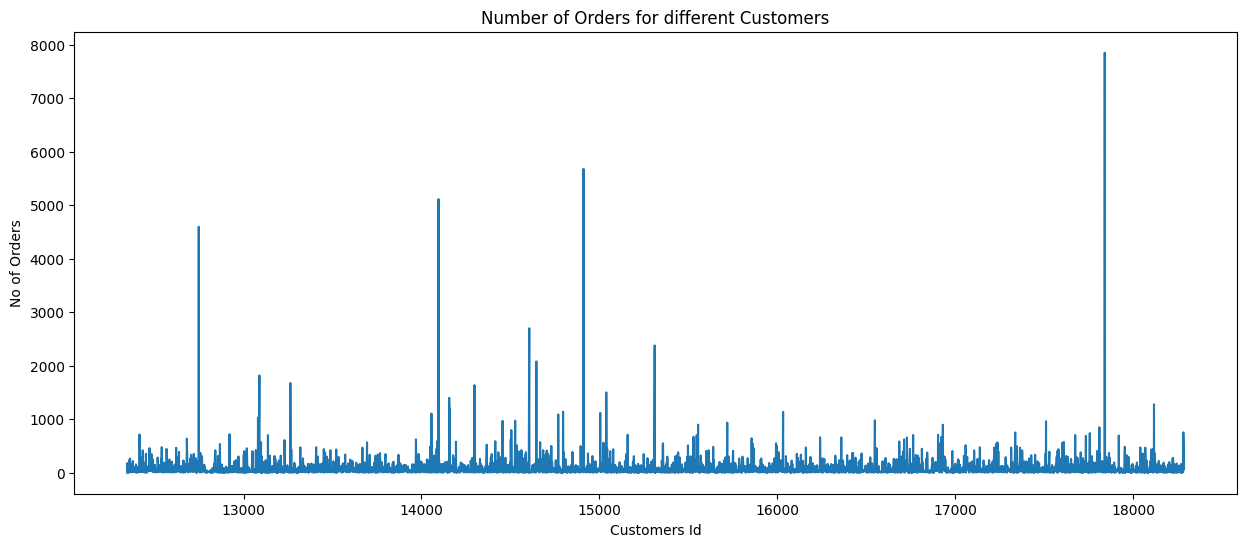

In [65]:
orders  = df_new.groupby(by = ['cust_id', 'country'], as_index = False)['invoice_num'].count()
plt.subplots(figsize=(15,6))

plt.plot(orders.cust_id, orders.invoice_num)

plt.xlabel('Customers Id')
plt.ylabel('No of Orders')

plt.title('Number of Orders for different Customers')

plt.show()

#### Visualizing - Money spent by  Different Customers

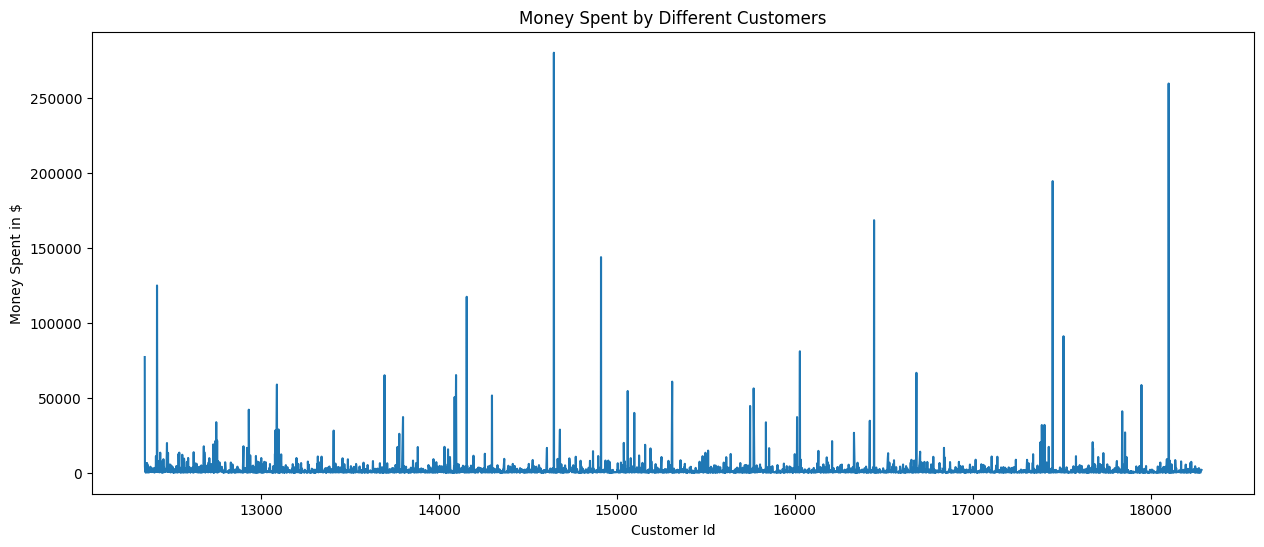

In [66]:
money_spent = df_new.groupby(by = ['cust_id', 'country'], as_index = False)['amount_spent'].sum()

plt.subplots(figsize = (15,6))

plt.plot(money_spent.cust_id,money_spent.amount_spent)

plt.xlabel('Customer Id')
plt.ylabel('Money Spent in $')
plt.title('Money Spent by Different Customers')

plt.show()

In [67]:
df_new.head()

,invoice_num,invoice_date,year_month,month,day,Hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


In [68]:
color  = sns.color_palette()

In [69]:
df_new.groupby('invoice_num')

In [70]:
df_new.groupby('invoice_num')['year_month']

In [71]:
df_new.groupby('invoice_num')['year_month'].unique().value_counts().sort_index()

year_month
[201012]    1400
[201101]     987
[201102]     998
[201103]    1321
[201104]    1149
[201105]    1555
[201106]    1393
[201107]    1331
[201108]    1281
[201109]    1756
[201110]    1929
[201111]    2658
[201112]     778
Name: count, dtype: int64

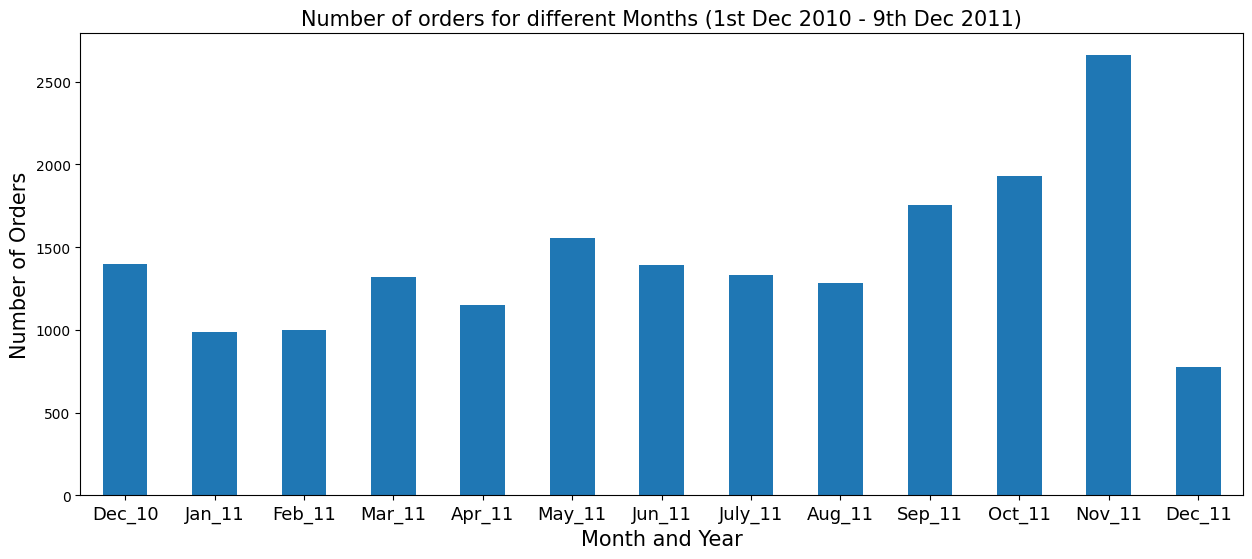

In [72]:
ax = df_new.groupby('invoice_num')['year_month'].unique().value_counts().sort_index().plot(kind = 'bar',color = color[0],figsize = (15,6))

ax.set_xlabel('Month and Year',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)', fontsize = 15)

t = ('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11')

ax.set_xticklabels(t, rotation='horizontal', fontsize=13)

plt.show()